# Loan application status prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df=pd.read_csv('Loan application status prediction.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Getting a basic outlook over the dataset

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observations:
    
    1.There are null values in the dataset.

In [4]:
df.shape

(614, 13)

Observations:
    
    1.There are 13 columns and 614 rows.

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Observations:
    
    1.There are categorical, integer, and float columns are present.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


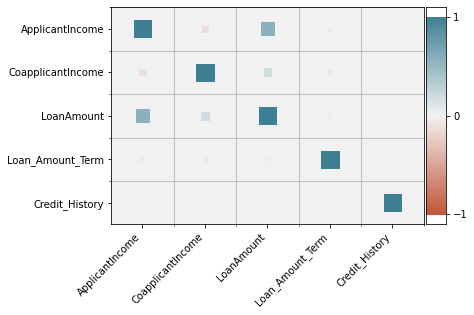

In [9]:
from heatmap import heatmap,corrplot
plt.plot(figsize=(17,9))
corrplot(df.corr(),size_scale=300)

Observations:
    
    1.The label encoding has to be done.

# Univariate Analysis

**Column 1: Loan_ID**

In [10]:
df['Loan_ID'].head()

0    LP001002
1    LP001003
2    LP001005
3    LP001006
4    LP001008
Name: Loan_ID, dtype: object

In [11]:
df['Loan_ID'].value_counts()

LP002335    1
LP001345    1
LP001996    1
LP002054    1
LP002181    1
LP002449    1
LP001052    1
LP001784    1
LP001310    1
LP002738    1
LP001998    1
LP001448    1
LP001520    1
LP002693    1
LP001955    1
LP001870    1
LP001250    1
LP001050    1
LP002807    1
LP002262    1
LP001888    1
LP002938    1
LP002473    1
LP001504    1
LP002328    1
LP001146    1
LP002288    1
LP001947    1
LP001528    1
LP001256    1
LP002114    1
LP002500    1
LP002305    1
LP001519    1
LP002606    1
LP001543    1
LP002308    1
LP001449    1
LP002178    1
LP002191    1
LP002562    1
LP002367    1
LP001497    1
LP001910    1
LP002224    1
LP001030    1
LP001562    1
LP002705    1
LP001915    1
LP001579    1
LP002600    1
LP002494    1
LP001245    1
LP002847    1
LP002776    1
LP002798    1
LP002067    1
LP002369    1
LP002368    1
LP002401    1
LP001977    1
LP001639    1
LP002795    1
LP002652    1
LP002051    1
LP002716    1
LP002734    1
LP002446    1
LP002626    1
LP001008    1
LP002505    1
LP0027

Observations:
    
    1.We can remove this column, since it doesnt provide any informations.

In [3]:
df1=df.drop('Loan_ID',axis=1)

**Column 2:Gender**

In [13]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [4]:
df1.replace(['Male','Female'],[1,0],inplace=True)

In [5]:
df1['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

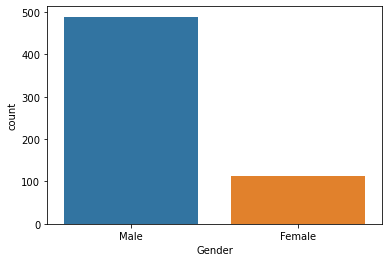

In [16]:
sns.countplot(df['Gender'])

Observations:
    
    1.We can see that the number of mens are more in number.

**Column 3: Married**

In [17]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [6]:
df1.replace(['Yes','No'],[1,0],inplace=True)

<AxesSubplot:xlabel='Married', ylabel='count'>

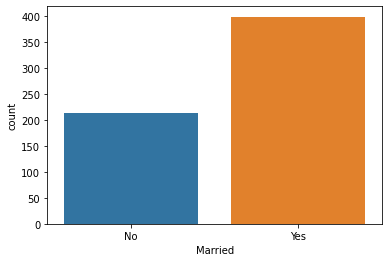

In [19]:
sns.countplot(df['Married'])

Observations:
    
    1.There are more married people than unmarried ones.

**Column 4: Dependents**

In [20]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

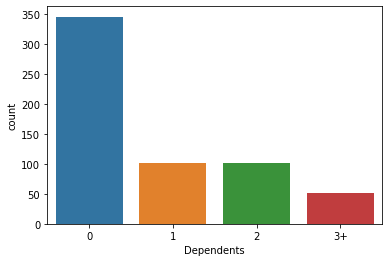

In [21]:
sns.countplot(df1['Dependents'])

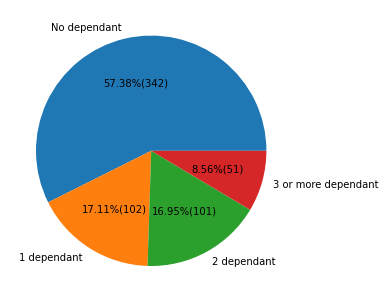

In [22]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['No dependant','1 dependant','2 dependant','3 or more dependant']
value=[342,102,101,51]
ax.pie(value,labels=langs,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:
    
    1.We can see that No dependant is in majority followed by one dependant and two.

**Column 5: Education**

In [23]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [7]:
df1['Education'].replace(['Graduate','Not Graduate'],[1,0],inplace=True)

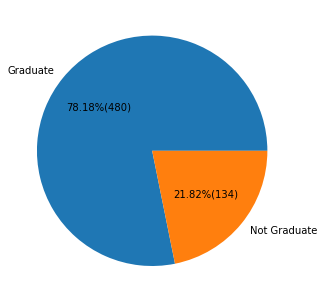

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Graduate','Not Graduate']
value=[480,134]
ax.pie(value,labels=langs,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:
    
    1.We can see that there are Graduate people than Not graduate. 

**Column 6: Self_Employed**

In [26]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
df1['Self_Employed'].value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

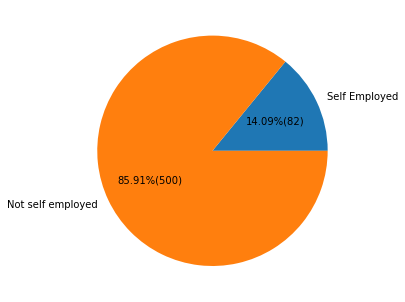

In [28]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Self Employed','Not self employed']
value=[82,500]
ax.pie(value,labels=langs,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:
    
    1.We can see that there are more not self employed of almost 85.91%.

**Column 7: ApplicantIncome**

In [29]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

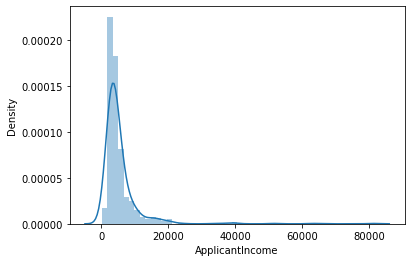

In [30]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:>

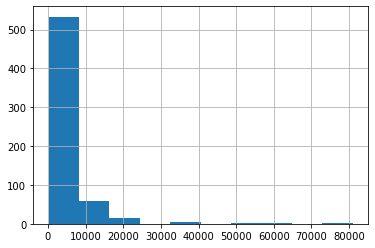

In [31]:
df['ApplicantIncome'].hist(grid=True)

Observations:
    
    1.Most of the income is under 15k.

<AxesSubplot:xlabel='ApplicantIncome'>

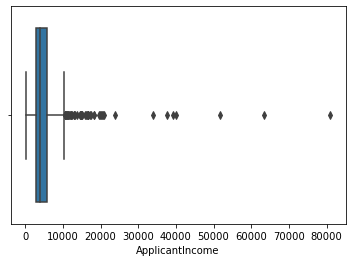

In [32]:
sns.boxplot(df['ApplicantIncome'])

Observations:
    
    1.There are outliers.

**Column 8: CoapplicantIncome**

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

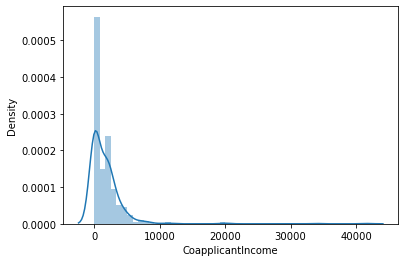

In [33]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:>

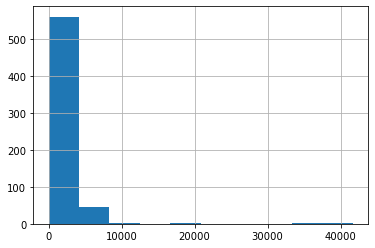

In [8]:
df['CoapplicantIncome'].hist(grid=True)

Observations:
    
    1.Most of them income are under 8k.

<AxesSubplot:xlabel='CoapplicantIncome'>

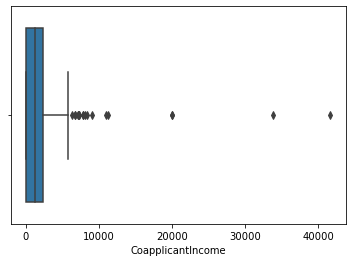

In [35]:
sns.boxplot(df['CoapplicantIncome'])

Observations:
    
    1.There are outliers.

**Column 9:LoanAmount**

In [36]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

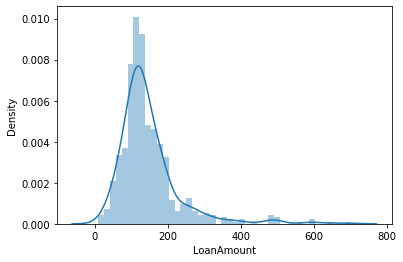

In [37]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:>

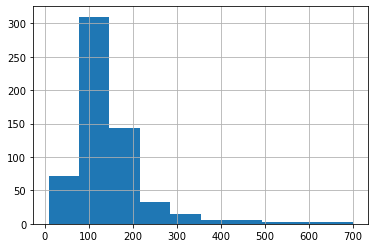

In [38]:
df['LoanAmount'].hist(grid=True)

Observations:
    
    1.Most of the loans are under 300.

**Column 10: Loan_Amount_Term'**

<AxesSubplot:>

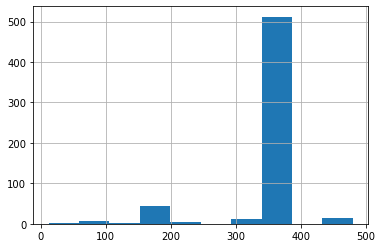

In [39]:
df['Loan_Amount_Term'].hist(grid=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

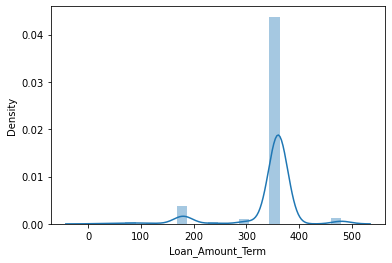

In [40]:
sns.distplot(df['Loan_Amount_Term'])

Observations:
    
    1.Most of the loan amount term are 350.

<AxesSubplot:xlabel='Loan_Amount_Term'>

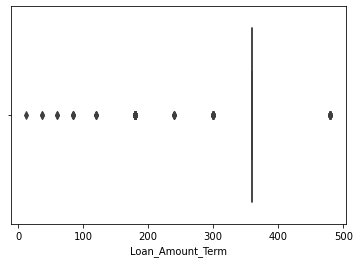

In [41]:
sns.boxplot(df['Loan_Amount_Term'])

In [42]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

**Column 11: Credit_History**

In [43]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

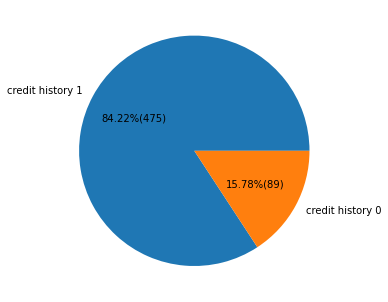

In [44]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['credit history 1','credit history 0']
value=[475,89]
ax.pie(value,labels=langs,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:
    
    1. We can see that 84.22% of people are with credit history 1.

**Column 12: Property_Area**

In [46]:
df['Property_Area'].describe()

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [47]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
df1['Property_Area'].replace(['Semiurban','Urban','Rural'],[0,1,2],inplace=True)

In [49]:
df1['Property_Area'].value_counts()

0    233
1    202
2    179
Name: Property_Area, dtype: int64

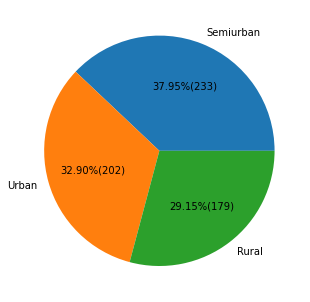

In [50]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Semiurban','Urban','Rural']
value=[233,202,179]
ax.pie(value,labels=langs,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:
    
    1.We can see that there are more semiurban background people followed by Urban and Rural.

**Column 13: Loan_Status**

In [51]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
df1['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)

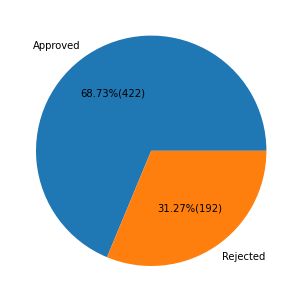

In [53]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Approved','Rejected']
value=[422,192]
ax.pie(value,labels=langs,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:
    
    1.We can see that there is a class imbalance.

# Multivariate Analysis

In [54]:
df.shape

(614, 13)

In [55]:
df1.shape

(614, 12)

In [56]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [57]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [59]:
from heatmap import heatmap,corrplot

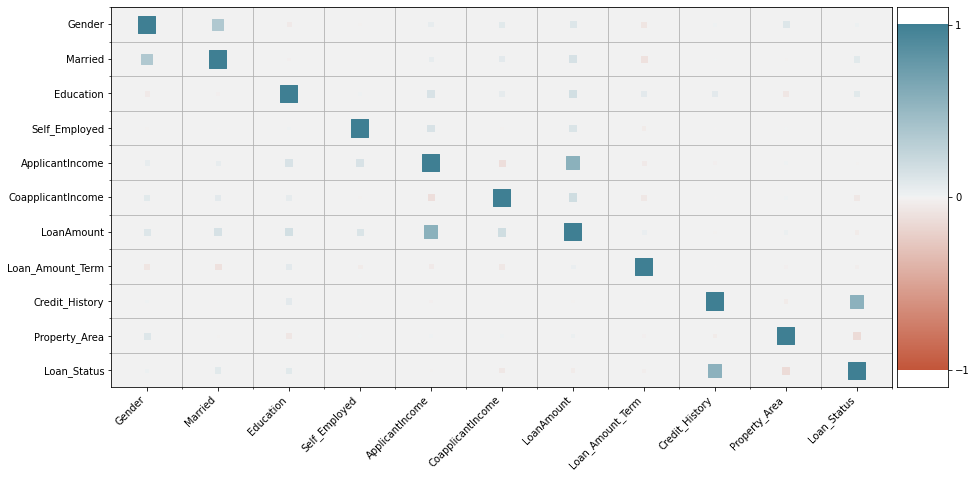

In [63]:
plt.figure(figsize=(15,7))
corrplot(df1.corr(),size_scale=300)

Observations:
    
    There are columns or independent variables which are significantly with Loan_status (response vaiable),
    1.Married
    2.Education
    3.credit_History
    4.Property_area

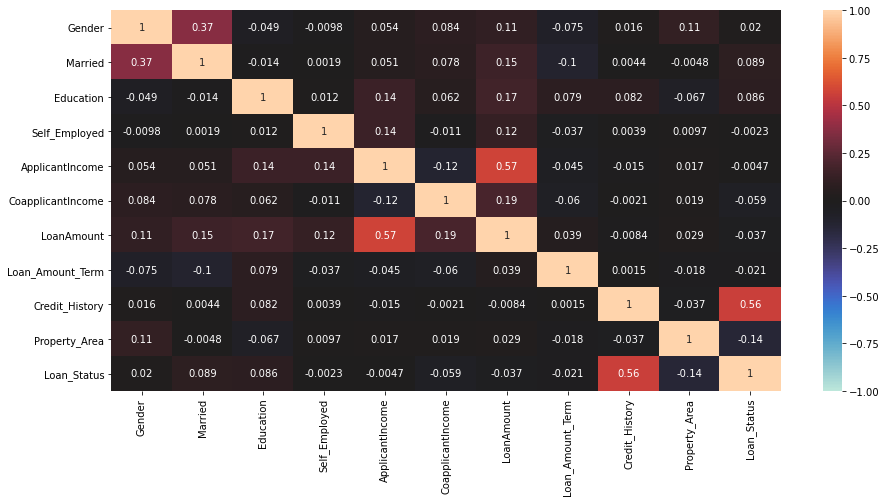

In [64]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

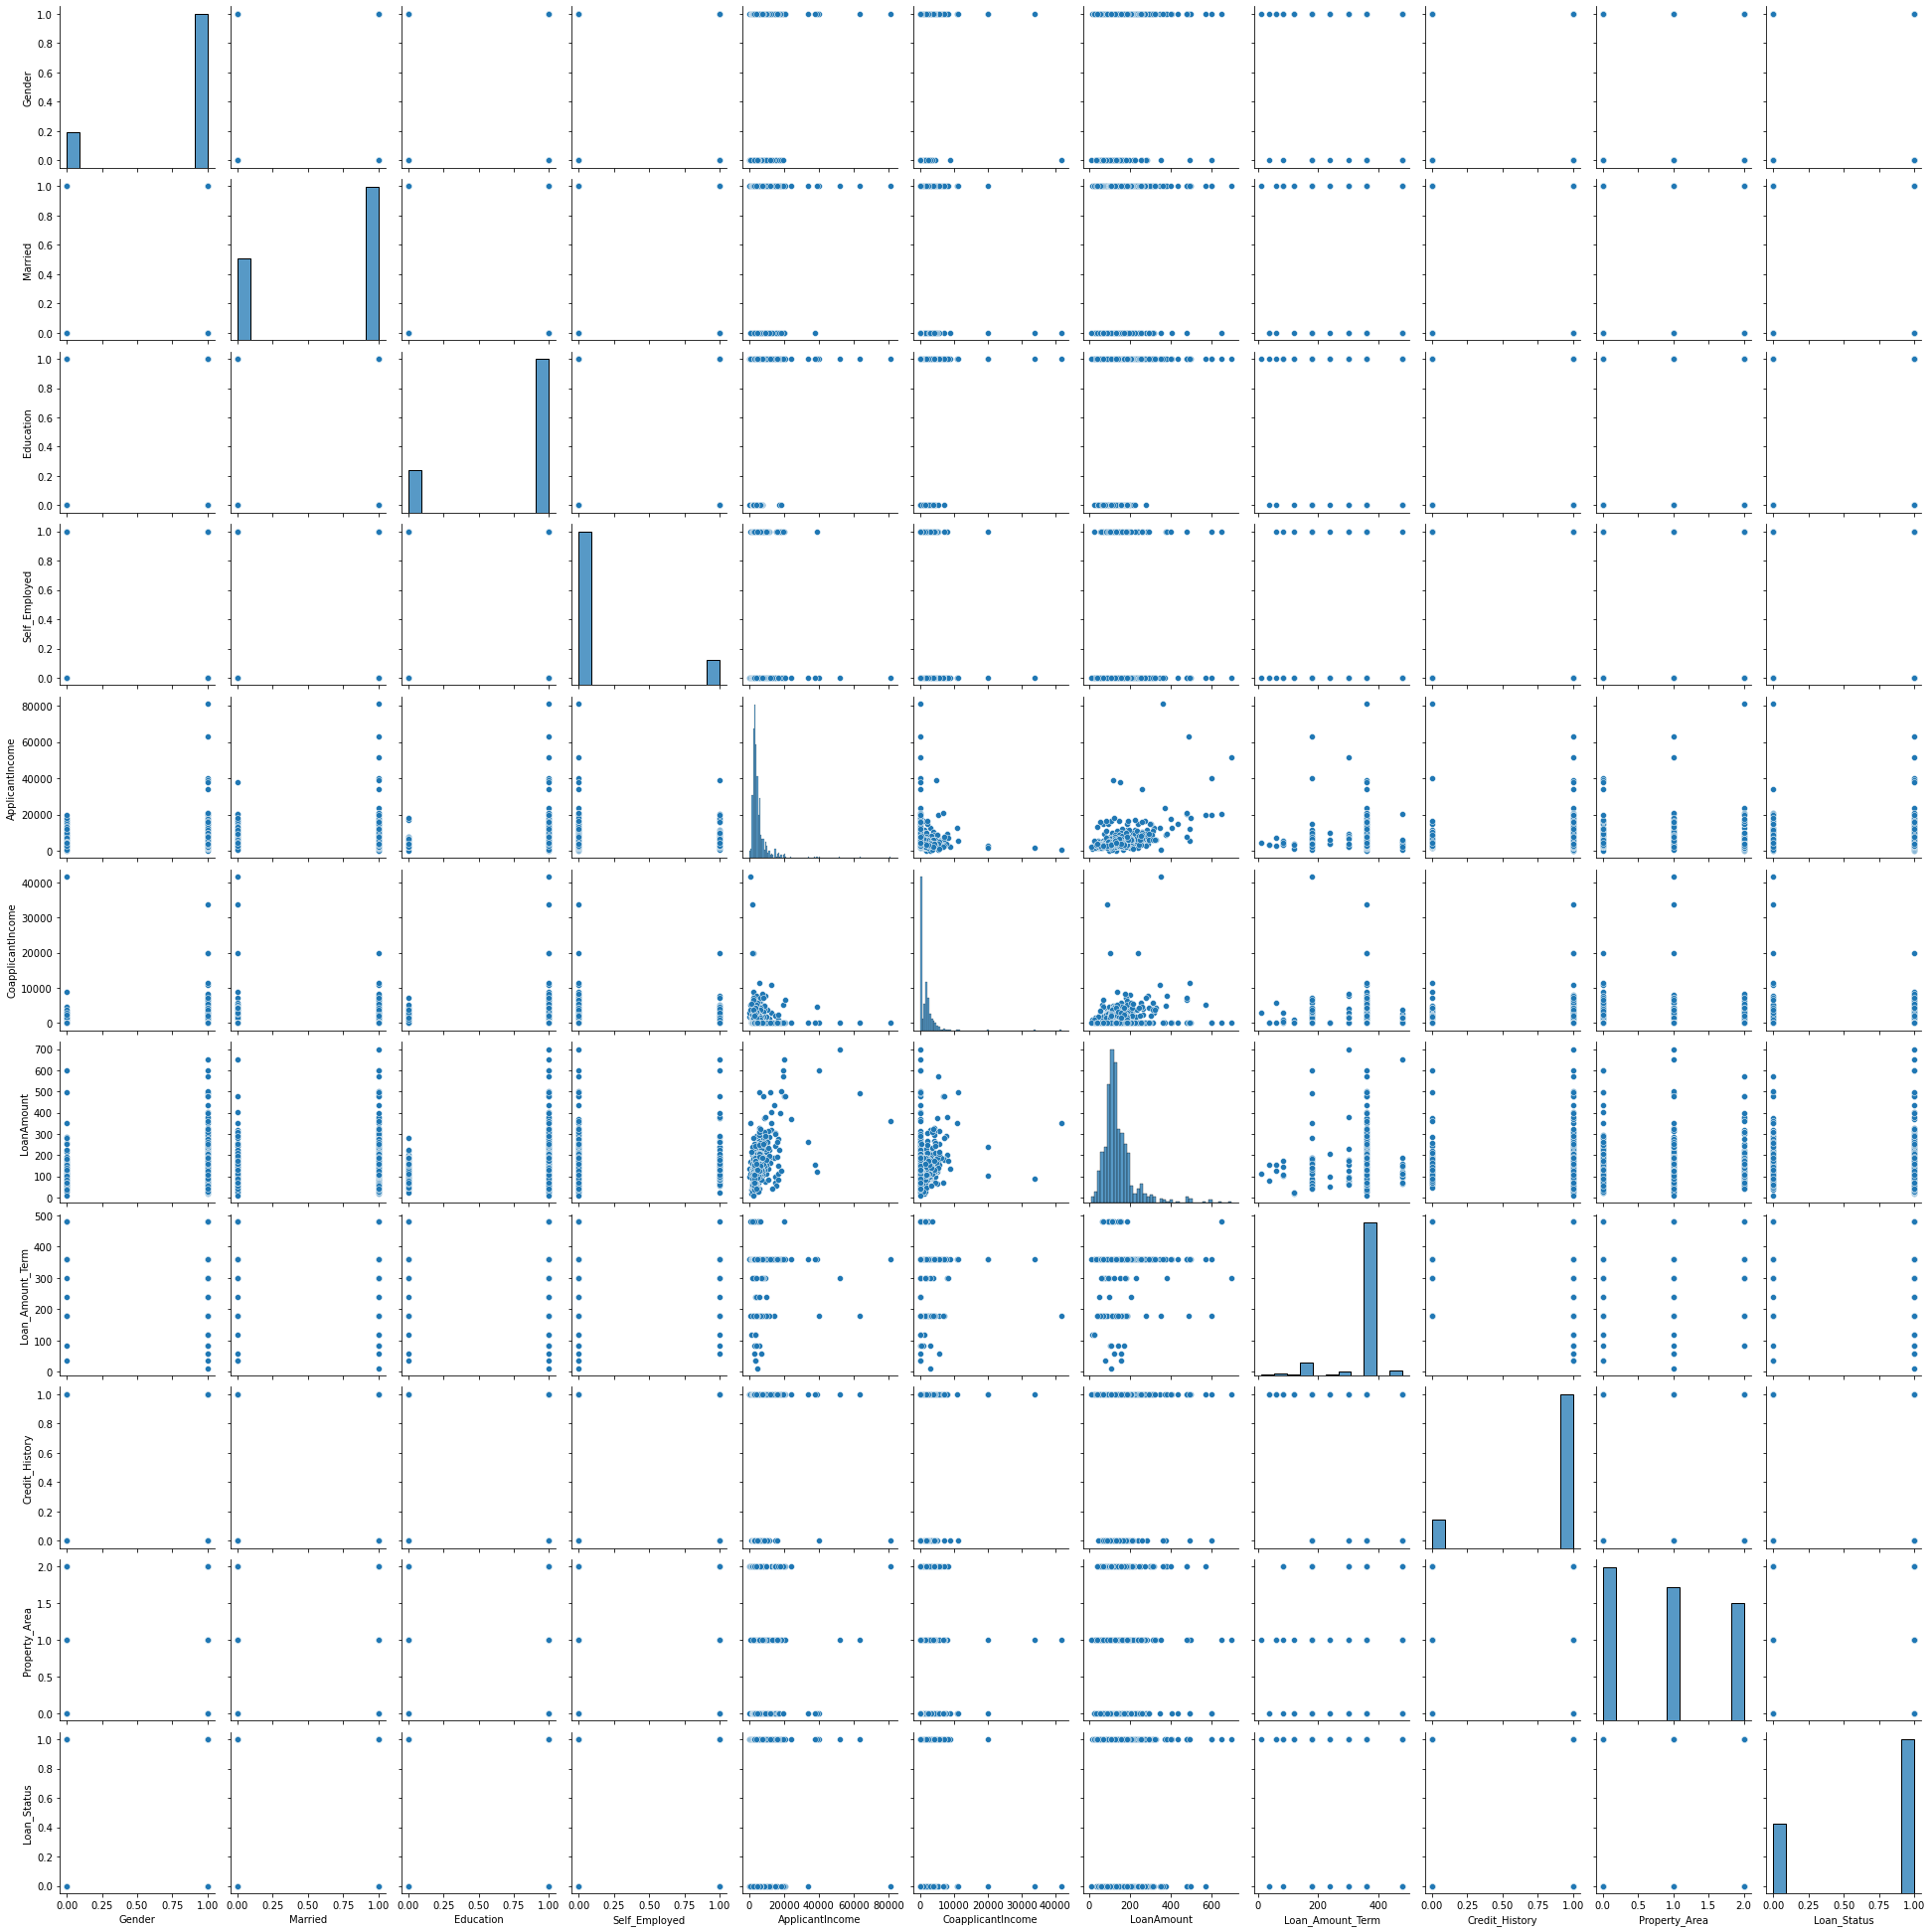

In [65]:
sns.pairplot(df1)

Observations:
    
    There are independent variables which are significantly correlated with each other
        1.Married vs Gender
        2.Applicant income vs loan amount
        3.Applicant income vs self employed
        4.Applicant income vs Education
        5.Married vs loan amount      

In [66]:
#Multivariate analysis using grouping

In [80]:
status=df1.groupby('Loan_Status')

In [81]:
status_y=status.get_group(1)

In [82]:
status_n=status.get_group(0)

In [78]:
df1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df1['Dependents'].replace('3',3,inplace=True)

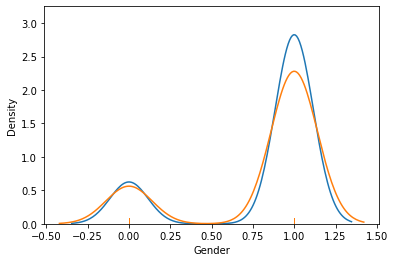

In [72]:
plt.plot()
sns.distplot(status_y['Gender'],hist=False,rug=True)
sns.distplot(status_n['Gender'],hist=False,rug=True)
plt.show()

In [73]:
df1['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [74]:
status_y['Gender'].value_counts()

1.0    339
0.0     75
Name: Gender, dtype: int64

In [75]:
status_n['Gender'].value_counts()

1.0    150
0.0     37
Name: Gender, dtype: int64

Observations:
    
    We can see that womens almost have loan applocation as yes.

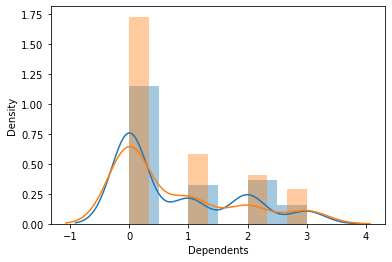

In [83]:
plt.plot()
sns.distplot(status_y['Dependents'])
sns.distplot(status_n['Dependents'])
plt.show()

Observations:
    
    1.Most of the status which says no will have dependents as 0.

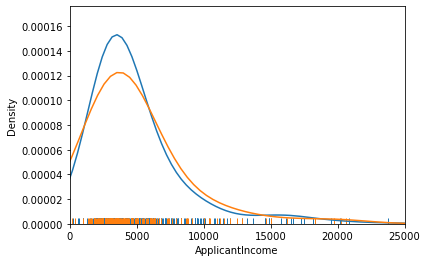

In [86]:
plt.plot()
sns.distplot(status_y['ApplicantIncome'],hist=False,rug=True)
sns.distplot(status_n['ApplicantIncome'],hist=False,rug=True)
plt.xlim(0,25000)
plt.show()

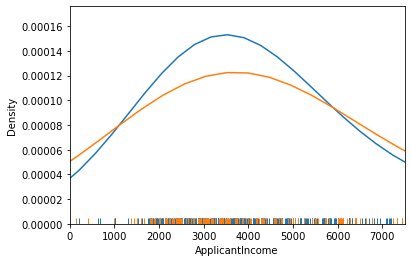

In [87]:
plt.plot()
sns.distplot(status_y['ApplicantIncome'],hist=False,rug=True)
sns.distplot(status_n['ApplicantIncome'],hist=False,rug=True)
plt.xlim(0,7500)
plt.show()

Observations:
    
    1.Those application status which says no will fall under 1000 to 6000 of applicant income range.

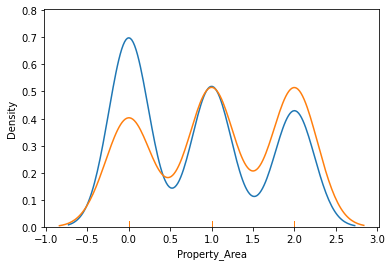

In [88]:
plt.plot()
sns.distplot(status_y['Property_Area'],hist=False,rug=True)
sns.distplot(status_n['Property_Area'],hist=False,rug=True)
plt.show()

Observations:
    
    1.Those applications which belongs to no category more likey to fall under 1.25 to 2.75 range of property income.

# Bi variate analysis

In [93]:
df1.loc[(df1['Married']==1)&(df1['Loan_Status']==0)].count()

Gender               109
Married              113
Dependents           109
Education            113
Self_Employed        108
ApplicantIncome      113
CoapplicantIncome    113
LoanAmount           106
Loan_Amount_Term     109
Credit_History       105
Property_Area        113
Loan_Status          113
dtype: int64

In [94]:
df1.loc[(df1['Married']==0)&(df1['Loan_Status']==0)].count()

Gender               78
Married              79
Dependents           77
Education            79
Self_Employed        75
ApplicantIncome      79
CoapplicantIncome    79
LoanAmount           75
Loan_Amount_Term     77
Credit_History       74
Property_Area        79
Loan_Status          79
dtype: int64

In [96]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

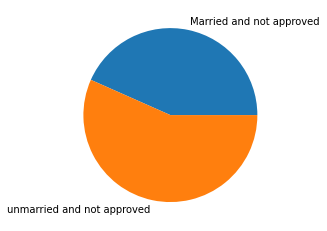

In [103]:
y = np.array([28.39,37.08])
mylabels = ['Married and not approved','unmarried and not approved']
plt.pie(y, labels = mylabels)
plt.show() 

Observations:
    
    1.We can see that more not approved loan status belongs to unmarried than married category.

In [100]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [101]:
df1['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [102]:
df1.loc[(df1['Education']==1)&(df1['Loan_Status']==0)].count()

Gender               136
Married              140
Dependents           137
Education            140
Self_Employed        132
ApplicantIncome      140
CoapplicantIncome    140
LoanAmount           134
Loan_Amount_Term     137
Credit_History       130
Property_Area        140
Loan_Status          140
dtype: int64

In [104]:
df1.loc[(df1['Education']==0)&(df1['Loan_Status']==0)].count()

Gender               51
Married              52
Dependents           49
Education            52
Self_Employed        51
ApplicantIncome      52
CoapplicantIncome    52
LoanAmount           47
Loan_Amount_Term     49
Credit_History       49
Property_Area        52
Loan_Status          52
dtype: int64

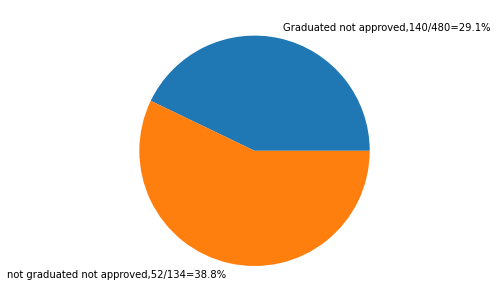

In [109]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Graduated not approved,140/480=29.1%','not graduated not approved,52/134=38.8%']
value=[29.1,38.8]
ax.pie(value,labels=langs)
plt.show()

Observations:
    
    1.In this case the not graduated are more likely to not get approved .

In [108]:
df1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [110]:
df1.loc[(df1['Credit_History']==1)&(df1['Loan_Status']==0)].count()

Gender               95
Married              97
Dependents           96
Education            97
Self_Employed        94
ApplicantIncome      97
CoapplicantIncome    97
LoanAmount           91
Loan_Amount_Term     97
Credit_History       97
Property_Area        97
Loan_Status          97
dtype: int64

In [111]:
df1.loc[(df1['Credit_History']==0)&(df1['Loan_Status']==0)].count()

Gender               79
Married              82
Dependents           77
Education            82
Self_Employed        81
ApplicantIncome      82
CoapplicantIncome    82
LoanAmount           78
Loan_Amount_Term     76
Credit_History       82
Property_Area        82
Loan_Status          82
dtype: int64

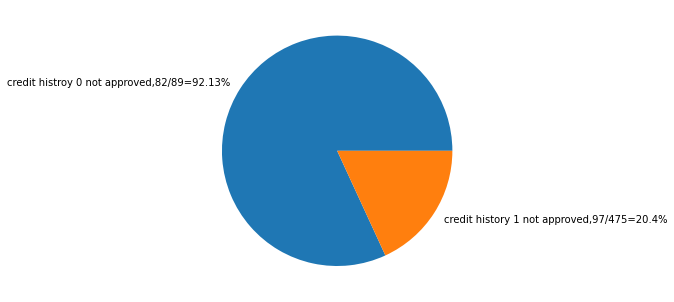

In [112]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['credit histroy 0 not approved,82/89=92.13%','credit history 1 not approved,97/475=20.4%']
value=[92.13,20.4]
ax.pie(value,labels=langs)
plt.show()

Observations:
    
    1.We can see that in most of the cases where there is not approved loan status is there there the credit history is 0 in almost 90% of cases.

In [115]:
df1['Property_Area'].value_counts()

0    233
1    202
2    179
Name: Property_Area, dtype: int64

In [116]:
df1.loc[(df1['Property_Area']==0)&(df1['Loan_Status']==0)].count()

Gender               52
Married              54
Dependents           52
Education            54
Self_Employed        52
ApplicantIncome      54
CoapplicantIncome    54
LoanAmount           53
Loan_Amount_Term     53
Credit_History       49
Property_Area        54
Loan_Status          54
dtype: int64

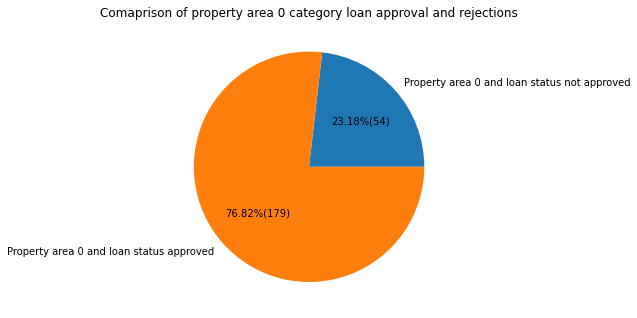

In [117]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Property area 0 and loan status not approved','Property area 0 and loan status approved']
value=[54,179]
ax.pie(value,labels=langs,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of property area 0 category loan approval and rejections')
plt.show()

Observations:
    
    1.We can see that more than 76.82% of property area 0 belongs to category loan status approved.

In [118]:
df1.loc[(df1['Property_Area']==1)&(df1['Loan_Status']==0)].count()

Gender               68
Married              69
Dependents           66
Education            69
Self_Employed        65
ApplicantIncome      69
CoapplicantIncome    69
LoanAmount           62
Loan_Amount_Term     66
Credit_History       65
Property_Area        69
Loan_Status          69
dtype: int64

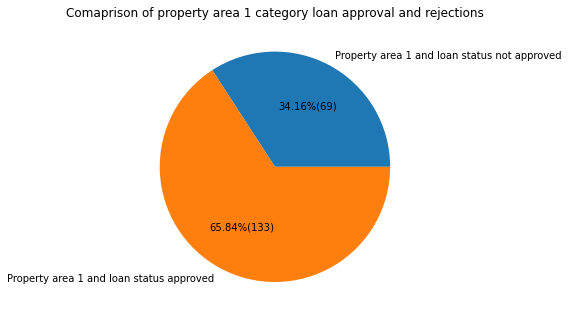

In [119]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Property area 1 and loan status not approved','Property area 1 and loan status approved']
value=[69,133]
ax.pie(value,labels=langs,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of property area 1 category loan approval and rejections')
plt.show()

Observations:
    
    1.We can see that more than 65.84% of property area 1 belongs to category loan status approved.

In [120]:
df1.loc[(df1['Property_Area']==2)&(df1['Loan_Status']==0)].count()

Gender               67
Married              69
Dependents           68
Education            69
Self_Employed        66
ApplicantIncome      69
CoapplicantIncome    69
LoanAmount           66
Loan_Amount_Term     67
Credit_History       65
Property_Area        69
Loan_Status          69
dtype: int64

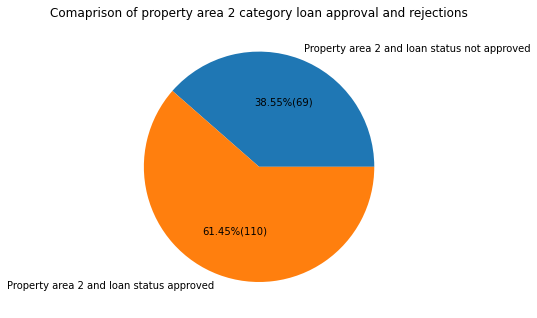

In [121]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Property area 2 and loan status not approved','Property area 2 and loan status approved']
value=[69,110]
ax.pie(value,labels=langs,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of property area 2 category loan approval and rejections')
plt.show()

Observations:
    
    1.We can see that more than 61.45% of property area 2 belongs to category loan status approved

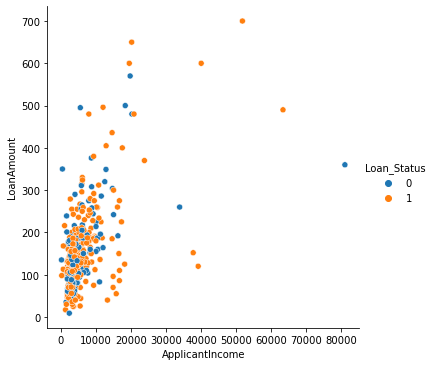

In [123]:
sns.relplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=df1)

Observations:
    
    1.We can see that as applicant income increases the loan amount is also going to increase.

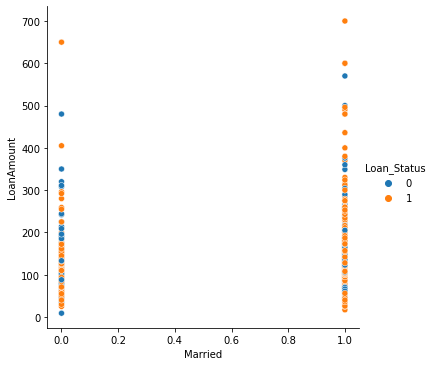

In [124]:
sns.relplot(x='Married',y='LoanAmount',hue='Loan_Status',data=df1)

Observations:
    
    1.Married people take high loans in comaprision with unmarried and their approval status is yes in most of the cases.

# Data cleaning

In [12]:
df1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [127]:
df1['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [15]:
df1['Gender'].fillna(1,inplace=True)

In [16]:
df1['Married'].value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [17]:
df1['Married'].fillna(1,inplace=True)

In [18]:
df1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
df1['Dependents'].fillna(0,inplace=True)

In [20]:
df1['Self_Employed'].value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [21]:
df1['Self_Employed'].fillna(0,inplace=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

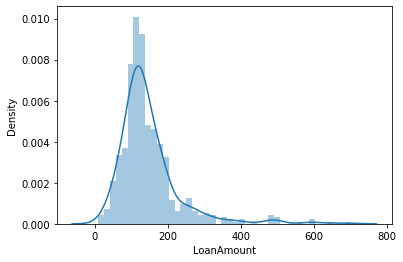

In [22]:
sns.distplot(df1['LoanAmount'])

In [138]:
df1['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [23]:
df1['LoanAmount'].fillna(128,inplace=True)

In [140]:
df1['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

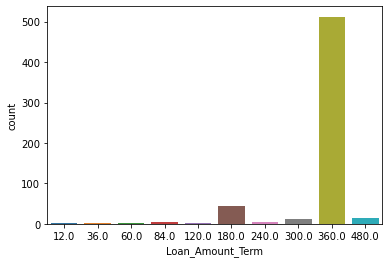

In [142]:
sns.countplot(df1['Loan_Amount_Term'])

In [24]:
df1['Loan_Amount_Term'].fillna(360,inplace=True)

In [144]:
df1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [25]:
df1['Credit_History'].fillna(1,inplace=True)

In [26]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Removing the outliers

# IQR method

In [33]:
q1=df1.quantile(0)
q3=df1.quantile(0.9)
IQR=q3-q1
dfiq_new=df1[~((df1 <(q1-1.5*IQR))|(df1 >(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df1.shape[0]-dfiq_new.shape[0])/df1.shape[0])

percentage of loss of data by IQR is : 0.02768729641693811


In [34]:
dfiq_new.shape

(597, 12)

In [35]:
df.shape

(614, 13)

In [37]:
dfiq_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [41]:
dfiq_new['Dependents'].value_counts()

0     339
2     100
1      98
3+     45
0      15
Name: Dependents, dtype: int64

In [42]:
dfiq_new['Dependents'].replace('3+',3,inplace=True)

# splitting the variable

In [44]:
x=dfiq_new.drop('Loan_Status',axis=1)
y=dfiq_new['Loan_Status']

# Removal of skewness

In [45]:
x.skew()

Gender              -1.632954
Married             -0.637919
Dependents           1.034702
Education           -1.324178
Self_Employed        2.197359
ApplicantIncome      2.240056
CoapplicantIncome    1.380455
LoanAmount           2.013543
Loan_Amount_Term    -2.469598
Credit_History      -2.032463
Property_Area        0.151992
dtype: float64

We have to deal with the skewness of

    1.ApplicantIncome   
    2.CoapplicantIncome  
    3.LoanAmount           
    4.Loan_Amount_Term

In [53]:
x['ApplicantIncome']=np.cbrt(x['ApplicantIncome'])

In [55]:
x['CoapplicantIncome']=np.cbrt(x['CoapplicantIncome'])

In [57]:
x['LoanAmount']=np.cbrt(x['LoanAmount'])

In [65]:
x.skew()

Gender              -1.632954
Married             -0.637919
Dependents           1.034702
Education           -1.324178
Self_Employed        2.197359
ApplicantIncome      0.943875
CoapplicantIncome   -0.010069
LoanAmount           0.392209
Loan_Amount_Term    -2.469598
Credit_History      -2.032463
Property_Area        0.151992
dtype: float64

In [67]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xs=scale.fit_transform(x) #from this our accuracy decreases.

# Dealing with class imbalance

In [69]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
x_smote,y_smote=SM.fit_sample(x,y)

In [72]:
#these models will produce low accuracy

# Building the models

In [74]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [77]:
#Finding the best random state
#Finding the maximum accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8985507246376812 on random state 143


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=143)

In [79]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.899
classification report is
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        36
           1       0.88      1.00      0.94       102

    accuracy                           0.90       138
   macro avg       0.94      0.81      0.85       138
weighted avg       0.91      0.90      0.89       138

confusion matrix is
[[ 22  14]
 [  0 102]]




In [80]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.87
classification report is
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        36
           1       0.87      0.97      0.92       102

    accuracy                           0.87       138
   macro avg       0.87      0.78      0.81       138
weighted avg       0.87      0.87      0.86       138

confusion matrix is
[[21 15]
 [ 3 99]]




In [81]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.739
classification report is
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.74      1.00      0.85       102

    accuracy                           0.74       138
   macro avg       0.37      0.50      0.42       138
weighted avg       0.55      0.74      0.63       138

confusion matrix is
[[  0  36]
 [  0 102]]




In [82]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.688
classification report is
              precision    recall  f1-score   support

           0       0.43      0.58      0.49        36
           1       0.83      0.73      0.77       102

    accuracy                           0.69       138
   macro avg       0.63      0.65      0.63       138
weighted avg       0.73      0.69      0.70       138

confusion matrix is
[[21 15]
 [28 74]]




In [83]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.594
classification report is
              precision    recall  f1-score   support

           0       0.14      0.11      0.12        36
           1       0.71      0.76      0.74       102

    accuracy                           0.59       138
   macro avg       0.43      0.44      0.43       138
weighted avg       0.56      0.59      0.58       138

confusion matrix is
[[ 4 32]
 [24 78]]




In [84]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.891
classification report is
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        36
           1       0.89      0.97      0.93       102

    accuracy                           0.89       138
   macro avg       0.89      0.82      0.85       138
weighted avg       0.89      0.89      0.89       138

confusion matrix is
[[24 12]
 [ 3 99]]




In [85]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.848
classification report is
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        36
           1       0.89      0.91      0.90       102

    accuracy                           0.85       138
   macro avg       0.81      0.79      0.80       138
weighted avg       0.84      0.85      0.85       138

confusion matrix is
[[24 12]
 [ 9 93]]




# Cross validation score

In [87]:
#cross val score for lg
score=cross_val_score(lg,x,y,cv=5)
print(lg,'score is:')
print(round((score.mean()),3))
print('\n')

LogisticRegression() score is:
0.809




In [88]:
#cross val score for gnb
score=cross_val_score(gnb,x,y,cv=5)
print(gnb,'score is:')
print(round((score.mean()),3))
print('\n')

GaussianNB() score is:
0.799




In [89]:
#cross val score for svc
score=cross_val_score(svc,x,y,cv=5)
print(svc,'score is:')
print(round((score.mean()),3))
print('\n')

SVC() score is:
0.692




In [90]:
#cross val score for dtc
score=cross_val_score(dtc,x,y,cv=5)
print(dtc,'score is:')
print(round((score.mean()),3))
print('\n')

DecisionTreeClassifier() score is:
0.727




In [91]:
#cross val score for knn
score=cross_val_score(knn,x,y,cv=5)
print(knn,'score is:')
print(round((score.mean()),3))
print('\n')

KNeighborsClassifier() score is:
0.62




In [92]:
#cross val score for add
score=cross_val_score(add,x,y,cv=5)
print(add,'score is:')
print(round((score.mean()),3))
print('\n')

AdaBoostClassifier() score is:
0.784




In [93]:
#cross val score for rf
score=cross_val_score(rf,x,y,cv=5)
print(rf,'score is:')
print(round((score.mean()),3))
print('\n')

RandomForestClassifier() score is:
0.799




The difference between accuracy and cross val score:
    
    
    1.logistic regression=0.09
    2.gnb                =0.071
    3.svc                =0.047
    4.dtc                =0.039
    5.knn                =0.026
    6.add                =0.107
    7.random forest      =0.049

I will choose random forest as best model because it has low difference, and since it is a binomial classification problem f1 score is too important, random forest has significantly good f1 score

# Hyper parameter tuning

In [94]:
grid_param={
    'criterion':['gini','entropy'],
    'max_features':['auto', 'sqrt', 'log2'],
    'class_weight':['balanced_subsample','balanced'],
    'bootstrap':[True,False],
    'n_estimators':[10,50,100],
    'min_samples_split':[2,4,6]
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 50}
0.8007002801120449


In [97]:
rf1=RandomForestClassifier(criterion='gini',max_features='log2',class_weight='balanced_subsample',bootstrap=True,n_estimators=50,min_samples_split=2)
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.862
classification report is
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
           1       0.90      0.92      0.91       102

    accuracy                           0.86       138
   macro avg       0.83      0.81      0.82       138
weighted avg       0.86      0.86      0.86       138

confusion matrix is
[[25 11]
 [ 8 94]]




Observations:
    
    1.The maximum accuracy score we got is 0.862 with least overfitting and high f1 score.

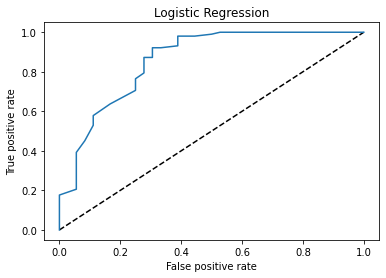

0.8080065359477123

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,rf1.predict(x_test))
auc_score

Observations:
    
    1.the 0.8 auc_roc score is very satisifactory.

# Saving the model

In [99]:
import joblib
joblib.dump(rf1,'loan_application.obj')

['loan_application.obj']